In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Black Friday Dataset.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### checking outliers

<Axes: >

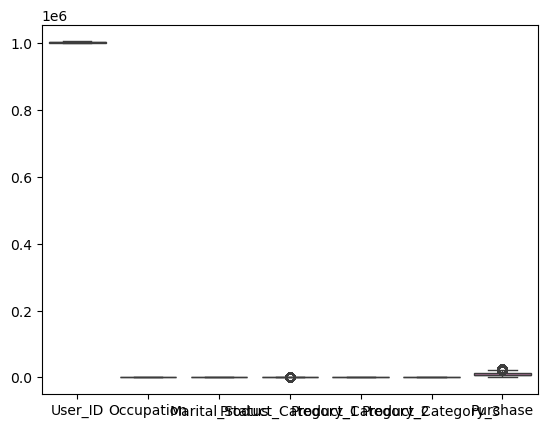

In [6]:
sns.boxplot(data)

In [7]:
df=data.copy()

In [8]:
del df['Product_Category_2']
del df['Product_Category_3']

In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Analysing columns

In [11]:
df['User_ID'].nunique()

5891

In [12]:
df['Product_ID'].nunique()

3631

In [13]:
print(df['Age'].nunique())
print(df['Age'].unique())

7
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [14]:
print(df['Occupation'].unique())
print(df['Occupation'].nunique())

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
21


In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
print('Number of product categories:-',df['Product_Category_1'].nunique())
print(df['Product_Category_1'].unique())

Number of product categories:- 20
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


In [17]:
df['Purchase'].mean()

9263.968712959126

### Analysing gender column

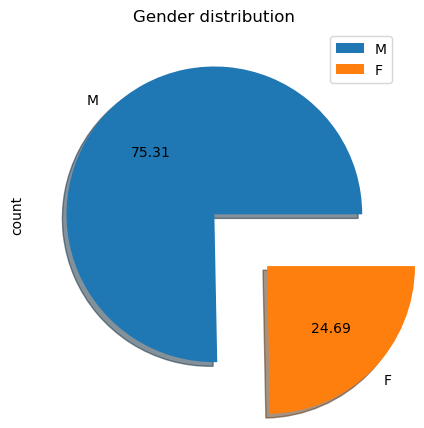

In [49]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f',title='Gender distribution',explode=[0,0.5],shadow=True)
plt.legend()

<Axes: title={'center': 'Gender distribution'}, xlabel='Gender'>

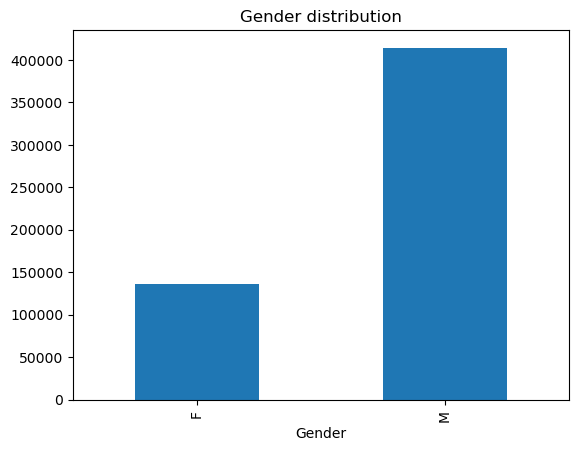

In [19]:
df.groupby('Gender').size().plot(kind='bar',title='Gender distribution')

### Male and Female purchase

In [20]:
df.groupby('Gender')['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

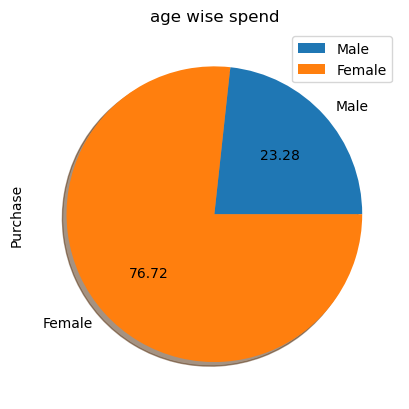

In [52]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',labels=['Male','Female'],autopct='%.2f',title='age wise spend',shadow=True)
plt.legend()
plt.show()

### Analysing age and gender

In [22]:
df.groupby('Age').size()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
dtype: int64

<Axes: xlabel='Age'>

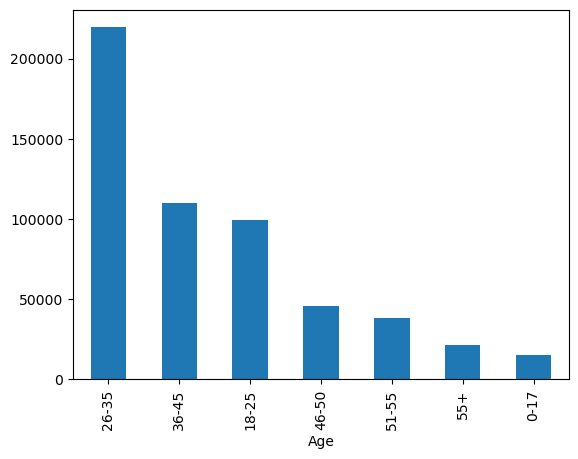

In [23]:
df['Age'].value_counts().plot(kind='bar')

In [24]:
for i in df['Age'].unique():
    print(i,'==>',len(df['Age']==i))

0-17 ==> 550068
55+ ==> 550068
26-35 ==> 550068
46-50 ==> 550068
51-55 ==> 550068
36-45 ==> 550068
18-25 ==> 550068


In [25]:
df.groupby('Age')['Purchase'].sum()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

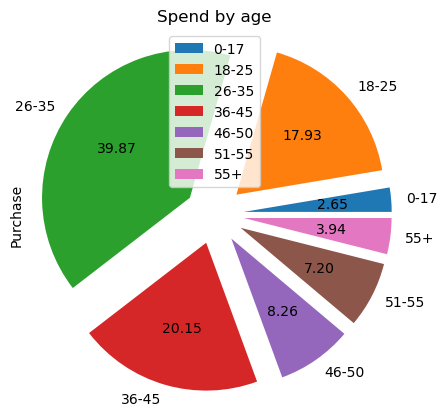

In [55]:
df.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct='%.2f',title='Spend by age',explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2])
plt.legend()

In [27]:
df.groupby('Marital_Status').size()

Marital_Status
0    324731
1    225337
dtype: int64

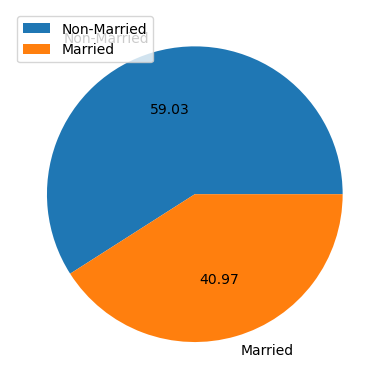

In [58]:
df.groupby('Marital_Status').size().plot(kind='pie',labels=['Non-Married','Married'],autopct='%.2f')
plt.legend()


### multicolumn analysis

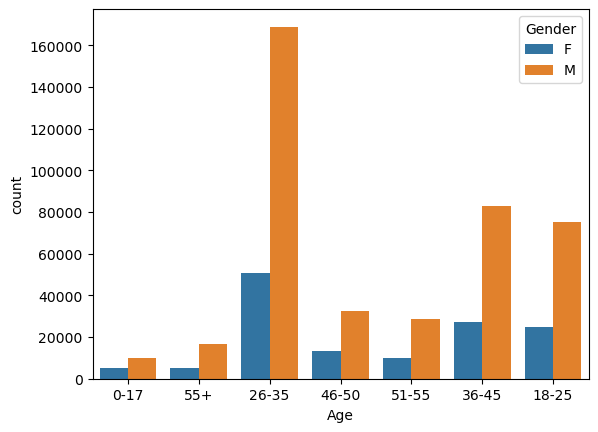

In [29]:
sns.countplot(x='Age',hue='Gender',data=df)
plt.show()

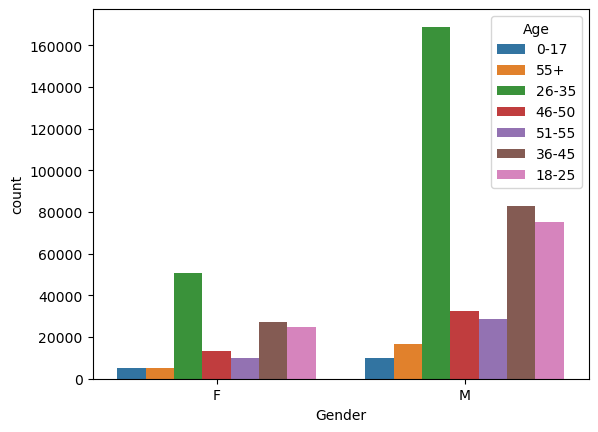

In [30]:
sns.countplot(x='Gender',hue='Age',data=df)
plt.show()

<Axes: xlabel='City_Category', ylabel='count'>

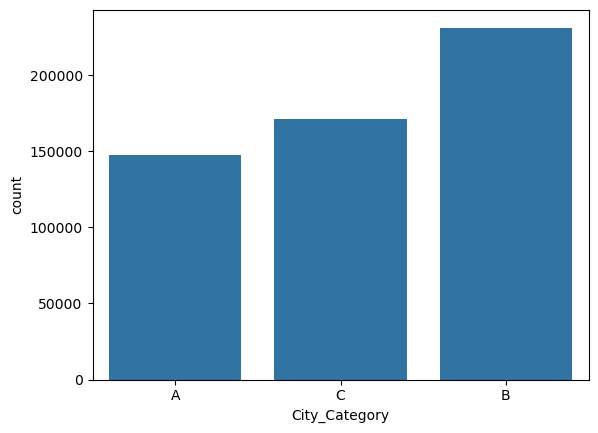

In [31]:
sns.countplot(x=df['City_Category'])

### city wise purchase 

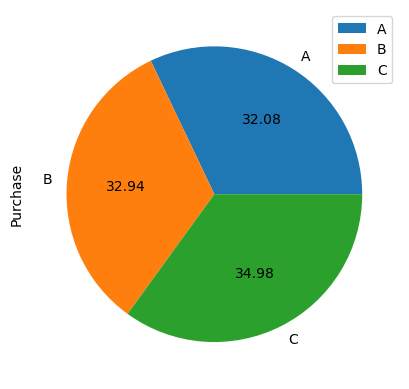

In [60]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%.2f')
plt.legend()

### Stay_In_Current_City_Years

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

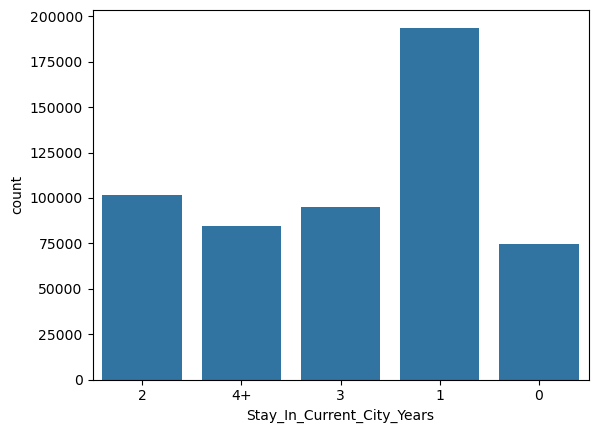

In [33]:
sns.countplot(x='Stay_In_Current_City_Years',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

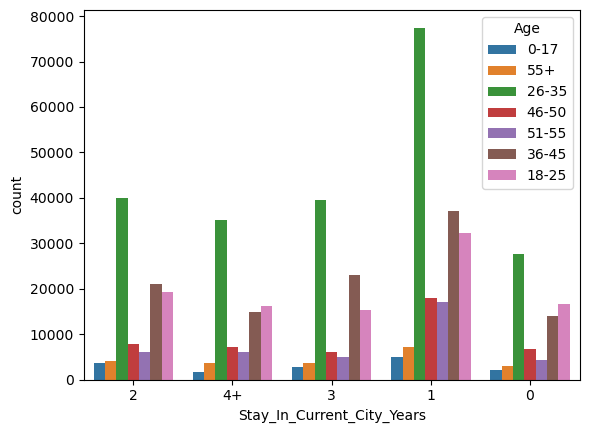

In [34]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Age',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

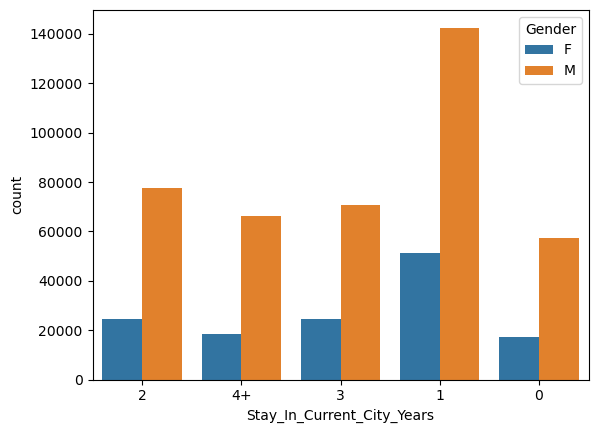

In [35]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

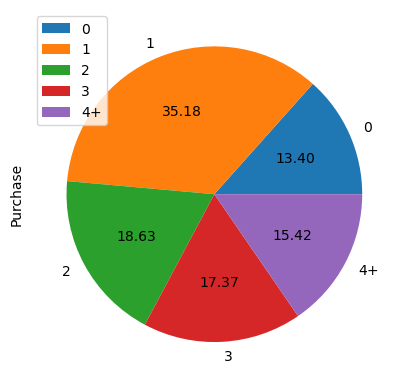

In [62]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='pie',autopct='%.2f')
plt.legend()

### Occupation

<Axes: xlabel='Occupation', ylabel='count'>

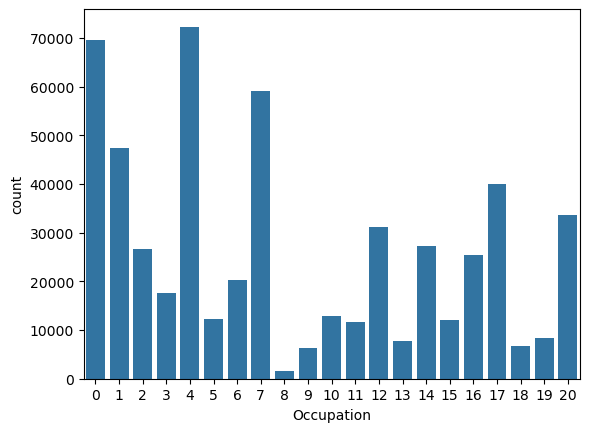

In [37]:
sns.countplot(x='Occupation',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

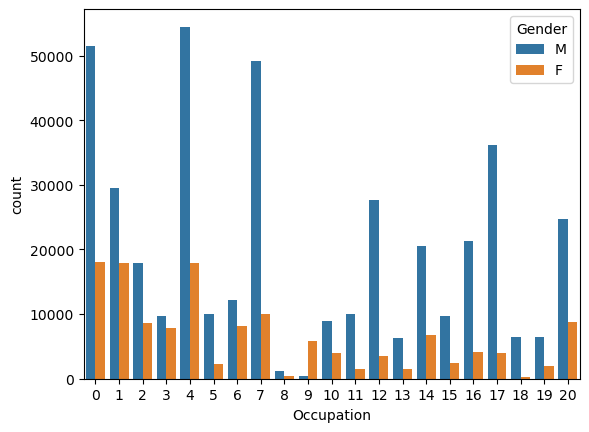

In [38]:
sns.countplot(x='Occupation',hue='Gender',data=df)

In [39]:
df.groupby('Occupation')["Purchase"].sum()

Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64

<Axes: xlabel='Occupation'>

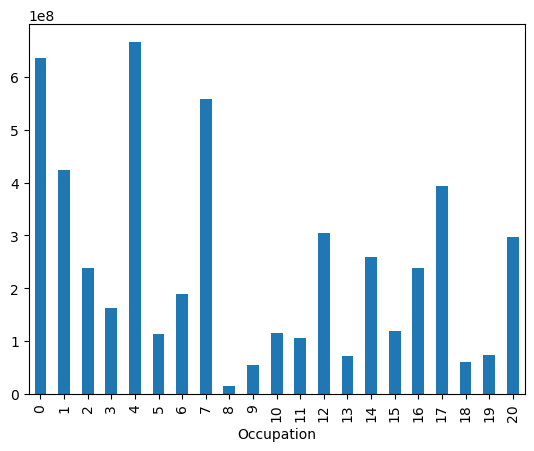

In [40]:
df.groupby('Occupation')["Purchase"].sum().plot(kind='bar')

<Axes: xlabel='Occupation'>

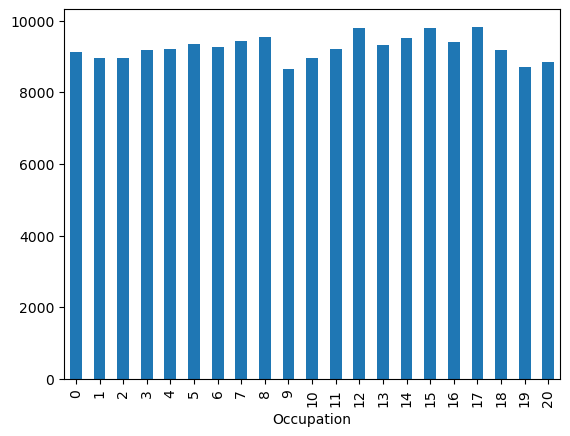

In [41]:
df.groupby('Occupation')["Purchase"].mean().plot(kind='bar')

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Occupation', ylabel='count'>

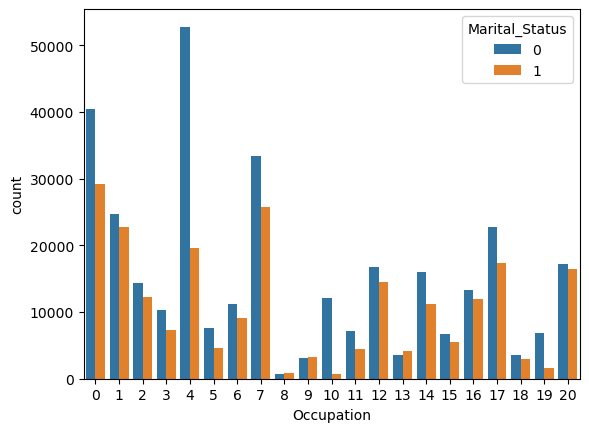

In [43]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Product_Category_1'>

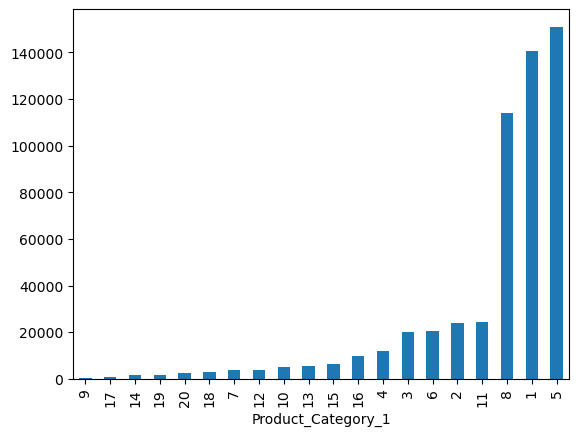

In [44]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

### Marital_Status and Gender

<Axes: xlabel='Gender', ylabel='count'>

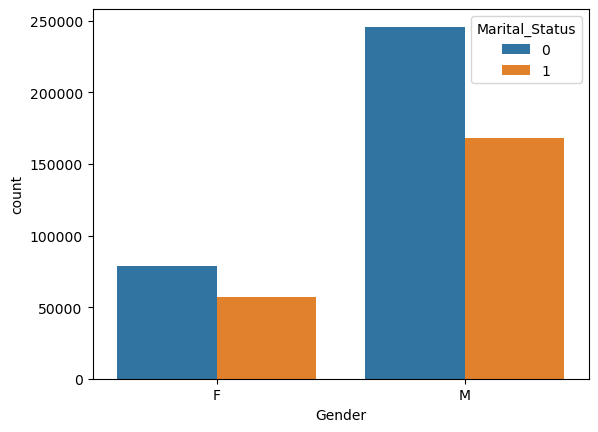

In [45]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

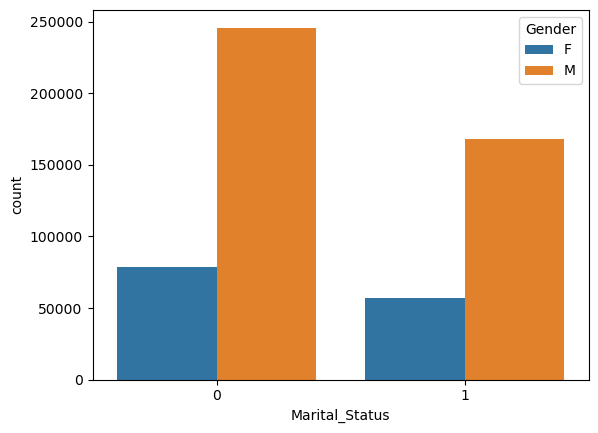

In [46]:
sns.countplot(x='Marital_Status',hue='Gender',data=df)